# Descriptive Statistics 

Dataset: Hoa Phat Group Joint Stock Company

### Step 1. Import modules

In [1]:
import numpy as np
import pandas as pd
import math
import statistics as st
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import skew
from scipy.stats import kurtosis

### Step 2. Read the dataset

In [2]:
df = pd.read_csv('HSG Historical Data.csv',delimiter=",", thousands=',')
df


,Date,Price,Open,High,Low,Vol.,Change %
0,05/31/2024,21800.0,21700.0,21900.0,21450.0,6.02M,1.16%
1,05/30/2024,21550.0,21500.0,21800.0,21350.0,7.18M,-1.37%
2,05/29/2024,21850.0,22200.0,22400.0,21750.0,10.03M,-0.91%
3,05/28/2024,22050.0,22150.0,22150.0,21900.0,7.26M,0.23%
4,05/27/2024,22000.0,21500.0,22000.0,21400.0,6.74M,2.09%
...,...,...,...,...,...,...,...
1308,03/07/2019,6034.4,6237.7,6277.1,6034.4,9.73M,-3.87%
1309,03/06/2019,6277.1,6473.8,6559.1,6106.5,15.89M,-3.43%
1310,03/05/2019,6500.1,6559.1,6821.5,6401.7,16.02M,-0.40%
1311,03/04/2019,6526.3,6421.4,6526.3,6231.1,14.78M,6.99%


### Step 3. Data Preprocessing

In [3]:
# Convert the data types
df['Date'] = pd.to_datetime(df['Date'])


In [4]:
# Data size
df.shape

(1313, 7)

In [5]:
# Determine the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1313 entries, 0 to 1312
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1313 non-null   datetime64[ns]
 1   Price     1313 non-null   float64       
 2   Open      1313 non-null   float64       
 3   High      1313 non-null   float64       
 4   Low       1313 non-null   float64       
 5   Vol.      1313 non-null   object        
 6   Change %  1313 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 71.9+ KB


### Step 4. Descriptive Statistics

In [6]:
# Describe the dataset
df.describe()

,Date,Price,Open,High,Low
count,1313,1313.000000,1313.000000,1313.000000,1313.000000
mean,2021-10-12 16:33:37.974105088,16613.344097,16632.347677,16959.246154,16318.818126
min,2019-03-01 00:00:00,3282.800000,3246.800000,3463.200000,3145.700000
25%,2020-06-23 00:00:00,7916.700000,7878.800000,8181.800000,7727.300000
50%,2021-10-12 00:00:00,15411.600000,15419.500000,15703.300000,15135.700000
75%,2023-02-07 00:00:00,21923.100000,21923.100000,22234.800000,21590.900000
max,2024-05-31 00:00:00,41541.700000,41750.000000,42750.000000,41333.300000
std,NaN,9498.291582,9521.865723,9680.018021,9351.885692


In [7]:
# Describe the 'Price' attribute
df['Price'].describe()

count     1313.000000
mean     16613.344097
std       9498.291582
min       3282.800000
25%       7916.700000
50%      15411.600000
75%      21923.100000
max      41541.700000
Name: Price, dtype: float64

In [8]:
# Mode
mode = st.mode(df['Price'])
print("Mode: ", mode)

# Variance
var = st.variance(df['Price'])
print("Variance: ", var)

# Median
median = st.median(df['Price'])
print("Median: ", median)

# Coefficient of Deviation
cv = st.stdev(df['Price']) / st.mean(df['Price'])
print("Coefficient of Deviation: ", cv)

# Skewness
skew = skew(df['Price'])
print("Skewness: ", skew)

# Kurtosis
kurtosis = kurtosis(df['Price'])
print("Kurtosis: ", kurtosis)

# Range
range = max(df['Price']) - min(df['Price'])
print("Range: ", range)

Mode:  14662.7
Variance:  90217542.9826957
Median:  15411.6
Coefficient of Deviation:  0.5717266509728752
Skewness:  0.6080949024041776
Kurtosis:  -0.45240485420348486
Range:  38258.899999999994


### Step 5. Visualization

In [9]:
# Get data
df1 = pd.DataFrame(df, columns=['Date', 'Price'])

# Set 'Date' column as index for comparison plotting
df1.index = df1.Date
df1.drop('Date', axis=1, inplace=True)
df1 = df1.asfreq('D')
df1['Price'] = df1['Price'].ffill()

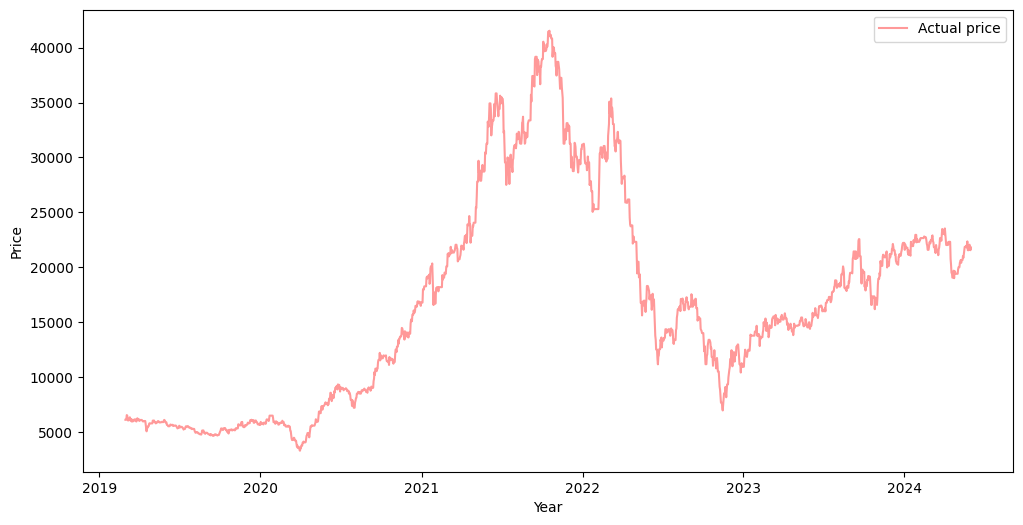

In [10]:
# Plot Price
plt.figure(figsize=(12, 6))
plt.plot(df1['Price'], label='Actual price', color='#FF9999')

# plt.title('HPG stock market')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Boxplot of HPG')

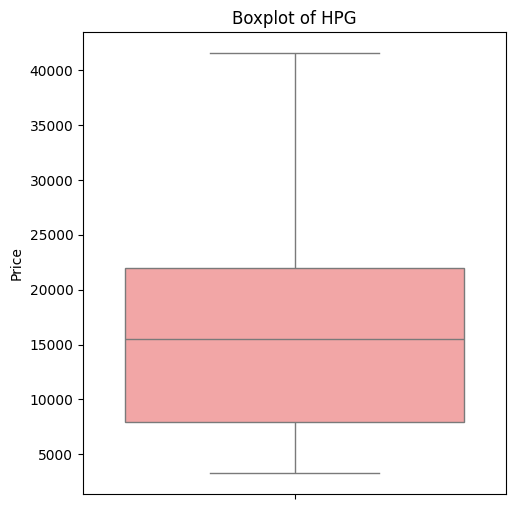

In [14]:
# Boxplot
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
sns.boxplot(df1['Price'], color='#FF9999', fliersize=5)
plt.title('Boxplot of HPG')

Text(0, 0.5, 'Frequency')

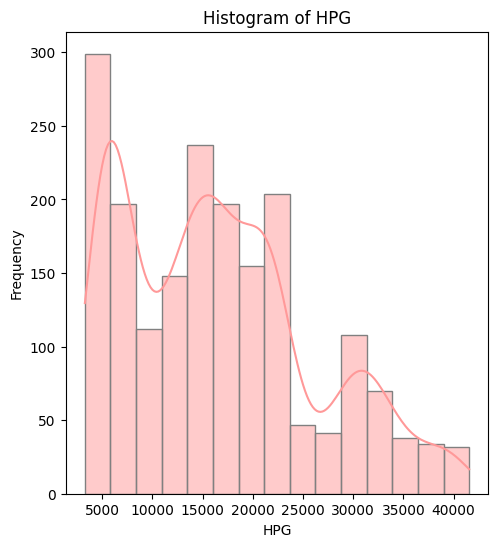

In [12]:
    # Histogram
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 2)
    sns.histplot(df1['Price'], bins=15, kde=True, color='#FF9999', edgecolor='grey')
    plt.title('Histogram of HPG')
    plt.xlabel('HPG')
    plt.ylabel('Frequency')

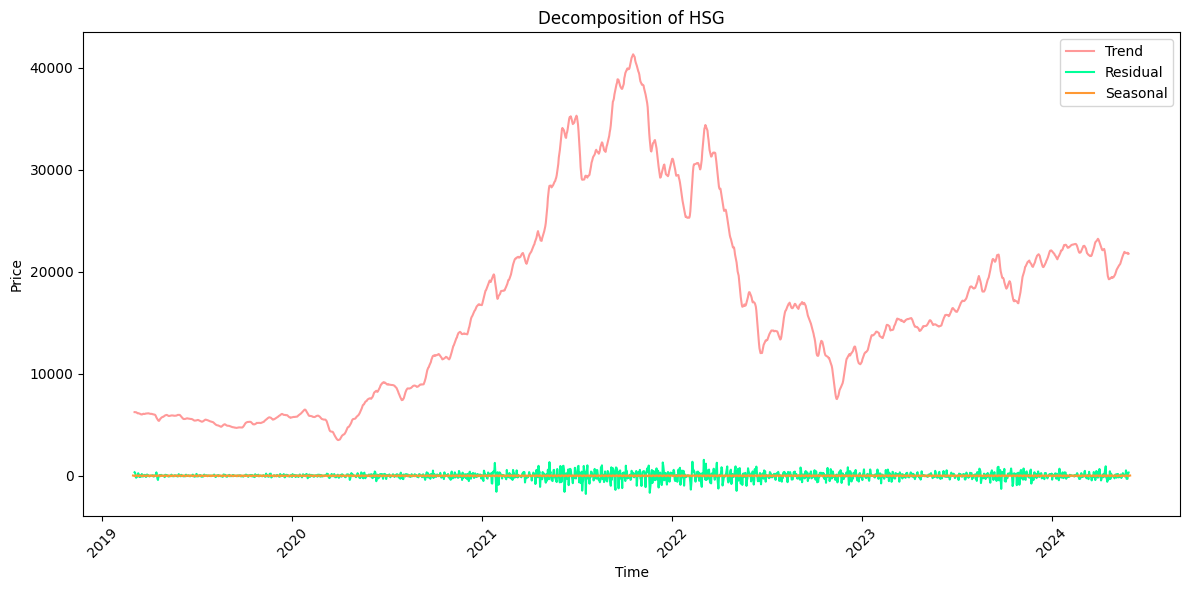

In [16]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Assuming your data is in a DataFrame named 'df1' with a 'Price' column

# Perform seasonal decomposition (additive model)
decomposition = sm.tsa.seasonal_decompose(df1['Price'], model='additive')

# Create a new figure for plotting (optional, comment out if using decomposition.plot())
plt.figure(figsize=(12, 6))

# Extract trend, seasonal, and residual components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Customize colors for each component
plt.plot(trend, label='Trend', color='#FF9999')  # Change from default to blue
plt.plot(residual, label='Residual', color='#00FF99')  # Change from default to green
plt.plot(seasonal, label='Seasonal', color='#FF9933')  # Change from default to orange


# Add labels and title
plt.legend()
plt.title('Decomposition of HSG')
plt.xlabel('Time')
plt.ylabel('Price')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# OR (using decomposition.plot() for a simpler approach)
# fig = decomposition.plot(color=['blue', 'orange', 'green'])  # Set colors in a list
# plt.show()